In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(train_x, train_fine_y), (test_x, test_fine_y) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 3s 0us/step


In [5]:
# Confirm that reloading the dataset does not require a download

(train_x, train_fine_y), (test_x, test_fine_y) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

Import the data¶
The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook

In [ ]:

# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [6]:
# Examine the shape of the data.


# Examine the shape of the data.
print(train_x.shape)
print(train_fine_y.shape)
print(test_x.shape)
print(test_fine_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


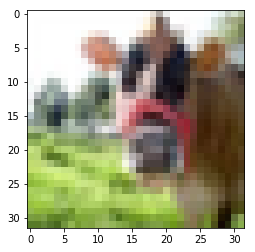

label=  [19]


In [7]:
# Examine one of the images and its corresponding label
plt.imshow(train_x[0])
plt.show()

print('label= ', train_fine_y[0])


In [8]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [9]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [ ]:
# Print the corresponding label for the example above



#### Load the data using different label modes

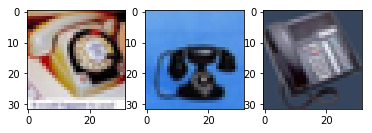

In [14]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_x[(train_fine_y.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [15]:
# Reload the data using the 'coarse' label mode

(train_x, train_coarse_y), (test_x, test_coarse_y) = cifar100.load_data(label_mode='coarse')

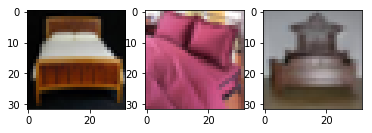

In [17]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_x[(train_fine_y.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [18]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [19]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [20]:
# Print the corresponding label for the example above

cifar100_coarse_labels[5]

'household electrical device'

#### Load the IMDB Dataset

In [22]:
from tensorflow.keras.datasets import imdb

In [23]:
# Load the IMDB dataset

(train_x, train_y), (test_x, test_y) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [24]:
# Print an example from the training dataset, along with its corresponding label

print(len(train_x[5]))
print(train_y[5])

43
0


In [26]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_x]

In [27]:
# Determine the maximum and minimum sequence length

print('Max= ', max(sequence_lengths))
print('Min= ', min(sequence_lengths))

Max=  2494
Min=  11


#### Using Keyword Arguments

In [28]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)
(train_x, train_y), (test_x, test_y) = imdb.load_data(skip_top=50, oov_char=2)


In [30]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_x]

In [31]:
# Determine the maximum and minimum sequence length


# Determine the maximum and minimum sequence length
print('Max= ', max(sequence_lengths))
print('Min= ', min(sequence_lengths))

Max=  2494
Min=  11


In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [32]:
# Remove the oov_char from the sequences using the filter_list function

train_x = filter_list(train_x)

NameError: name 'filter_list' is not defined

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length



***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [2]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [3]:
# Print the shape of the DataFrame
fertility.shape


(100, 10)

In [4]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [5]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [6]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [7]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [8]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [9]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.00,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0
1,-0.33,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0
2,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0
3,1.00,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38,1.0
4,1.00,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0


In [10]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [11]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0
1,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0,0,1,0,0
2,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0
3,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38,1.0,0,0,0,1
4,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0,0,0,0,1


In [12]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [13]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0
1,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0,0,1,0,0
2,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0
3,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38,1.0,0,0,0,1
4,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0,0,0,0,1


In [14]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [15]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [16]:
# Verify the shape of the training data

training.shape

(70, 13)

In [17]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [18]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [19]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [20]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.44,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  1.  ,  1.  , -1.  ,  0.8 ,  0.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.31,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.6 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  0.8 ,  1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.81,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  0.  ,  0.  ,  0.  , -1.  ,  0.8 , -1.  ,  0.44,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.75,  1.  ,  0.  ,  1.  ,  1.  ,  0.6 ,  0.  ,  0.56,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.72,  1.  ,  1.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.5 ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.47,  0.  ,
 

#### Build the model

In [21]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [22]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [26]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [27]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [28]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [29]:
# Set the epochs to 3

epochs = 3

In [30]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(training_features, training_labels, batch_size=30)
    model.fit_generator(train_generator, steps_per_epoch=train_steps,epochs= epochs, validation_data=validation_generator, validation_steps=1)

Epoch 1/3
14/14 [==============================] - 1s 46ms/step - loss: 0.4106 - accuracy: 0.7857 - val_loss: 0.0731 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 1s 44ms/step - loss: 0.0839 - accuracy: 0.9857 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 1s 38ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2/3
 0/14 [..............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [31]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

ValueError: Empty training data.

#### Make an infinitely looping generator

In [32]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permutations = np.random.permutation(len(features))
    features = features[permutations]
    labels = labels[permutations]

In [33]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [34]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [35]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [36]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, epochs=epochs, validation_data=validation_generator_cyclic, validation_steps=1)

Epoch 1/3
14/14 [==============================] - 1s 37ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 35ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 1s 37ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [37]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [38]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions))

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [39]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0.]


In [40]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [41]:
# Evaluate the model

next(validation_generator)


(array([[ 0.67,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.5 ,  1.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.64,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.19,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.61,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  1.  ,  1.  ,  0.8 , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.69,  1.  ,  0.  ,  1.  , -1.  ,  1.  , -1.  ,  0.44,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  0.  ,  1.  , -1.  ,  0.8 ,  1.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.69,  1.  ,  0.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.31,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  1.  ,  1.  ,  0.8 ,  0.  ,  0.19,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.5 ,  1.  ,  1.  ,  0.  , -1.  ,  0.8 ,  0.  ,  0.88,  0.  ,
 

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

Import the data
The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [1]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [6]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [7]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [8]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


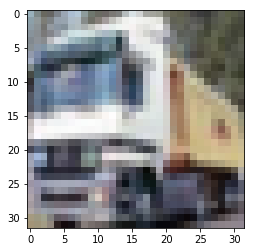

In [9]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [10]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [13]:
# Create an ImageDataGenerator object
image_generator = ImageDataGenerator(preprocessing_function=monochrome,
                                     rotation_range = 0.20,
                                     rescale=1/255.0)
image_generator.fit(training_features)


Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [14]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle= False)

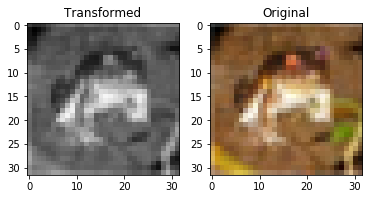

In [15]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [16]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [17]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [18]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [20]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, target_size=(16, 16), batch_size=64, classes=classes, subset='training')

Found 3027 images belonging to 5 classes.


In [21]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, target_size=(16, 16), batch_size=64, classes=classes, subset='training')

Found 1296 images belonging to 5 classes.


[0. 0. 0. 0. 1.]


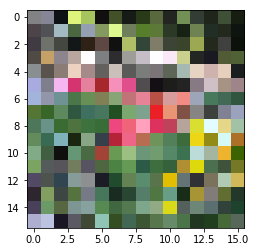

In [22]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [23]:
# Reset the training generator
train_generator = datagenerator.flow_from_directory(train_path, target_size=(16, 16), batch_size=64, classes=classes, subset='training')

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [24]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [25]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [26]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                2

#### Train the model

In [28]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [29]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

Epoch 1/5
47/47 [==============================] - 36s 760ms/step - loss: 1.6007 - accuracy: 0.2379
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 1.5315 - accuracy: 0.3125
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 1.4336 - accuracy: 0.3444
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 1.4183 - accuracy: 0.3476
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 1.3941 - accuracy: 0.3667


#### Evaluate the model

In [30]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

[1.3831686139106751, 0.38359374]

#### Predict using the generator

In [33]:
# Predict labels with the model
predictions = model.predict_generator(val_generator, steps=1)
print(predictions)
print(np.round(predictions, 0))

[[0.28410769 0.17785266 0.2326689  0.01945282 0.28591797]
 [0.21474832 0.18729346 0.3303417  0.0064529  0.2611636 ]
 [0.25762627 0.19216135 0.25540432 0.0205227  0.27428532]
 [0.2206585  0.19980544 0.13043842 0.05520768 0.39388993]
 [0.25582194 0.19759113 0.17217225 0.05946069 0.31495407]
 [0.09959517 0.27095643 0.07043266 0.37436557 0.18465018]
 [0.2290745  0.18438059 0.3272688  0.00657916 0.25269693]
 [0.23969467 0.20442384 0.22601442 0.04130046 0.28856656]
 [0.23577625 0.20132528 0.31350502 0.01078493 0.23860851]
 [0.22617275 0.21019219 0.146456   0.06488172 0.3522974 ]
 [0.1772873  0.23017819 0.09458098 0.13991614 0.35803744]
 [0.19919525 0.19760333 0.18085948 0.02467683 0.39766514]
 [0.20093854 0.24623454 0.10522342 0.20667522 0.24092828]
 [0.10436603 0.27672747 0.07652055 0.3904651  0.1519208 ]
 [0.11624228 0.28563008 0.07649599 0.3567937  0.16483797]
 [0.19302341 0.2037823  0.15369932 0.05182663 0.39766833]
 [0.31650326 0.1654078  0.1841571  0.02295772 0.31097406]
 [0.14983895 0

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [35]:
x = np.zeros((100,10,2,2))

In [36]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [37]:
# Inspect the Dataset object
print(dataset1)
print(dataset1.element_spec)

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [38]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [39]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [40]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [41]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [42]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [45]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [46]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [47]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [48]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [49]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [50]:
# Create a Dataset from the MNIST data
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))


In [51]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [54]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))

In [55]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [56]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [57]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [58]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset =  tf.data.TextLineDataset(text_files)

In [59]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [60]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [61]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [62]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [64]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)


In [65]:
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [66]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

Load the UCI Bank Marketing Dataset
Import the data
The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook

#### Load the UCI Bank Marketing Dataset

In [ ]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [ ]:
# Convert the DataFrame to a Dataset



In [ ]:
# Inspect the Dataset object



#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [ ]:
# Check the records in the dataset again

check_divorced()

#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

In [ ]:
# Remove the 'marital' column



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset



In [ ]:
# Inspect the Dataset object



#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

In [ ]:
# Make training and validation sets from the dataset



#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets



In [ ]:
# Shuffle the training data



In [ ]:
# Fit the model



In [ ]:
# Plot the training and validation accuracy

